In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load Data
trends = pd.read_csv('data/ai_tools_comparison.csv')
trends.head()

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


In [4]:
# Convert 'week' column to datetime and set as index
trends['week'] = pd.to_datetime(trends['week'])
trends.set_index('week', inplace=True)

In [5]:
# Most consistent growth
growth_rates = trends.pct_change().fillna(0).mul(100)
std_dev = growth_rates.std()
most_consistent_tool = std_dev.idxmin()
print(f"Most consistent tool: {most_consistent_tool}")

Most consistent tool: chatgpt


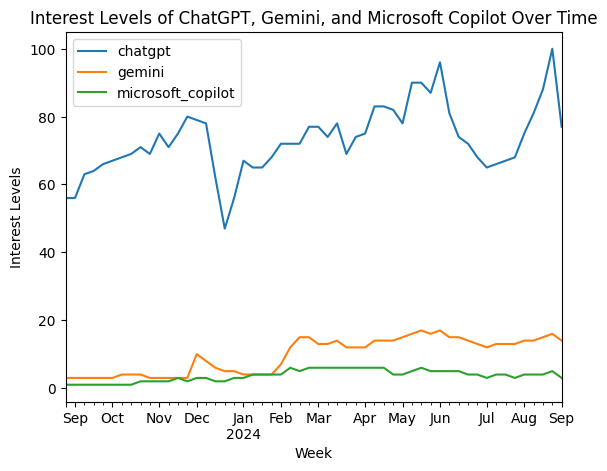

In [6]:
# Largest decline in ChatGPT interest
interest_levels = trends.copy()
interest_levels.plot(title="Interest Levels of ChatGPT, Gemini, and Microsoft Copilot Over Time")
plt.xlabel('Week')
plt.ylabel('Interest Levels')
plt.show()

In [7]:
# Estimated manually or visually:
gpt_dip = "December 2023"  # or "January 2024"
print(f"The worst month and year for ChatGPT: {gpt_dip}")

The worst month and year for ChatGPT: December 2023


In [9]:
# Month with highest average interest
monthly_data = trends.resample('ME').mean()
best_month = monthly_data.mean(axis=1).idxmax().strftime('%B')
print(f"Month with the highest interest: {best_month}")

Month with the highest interest: May


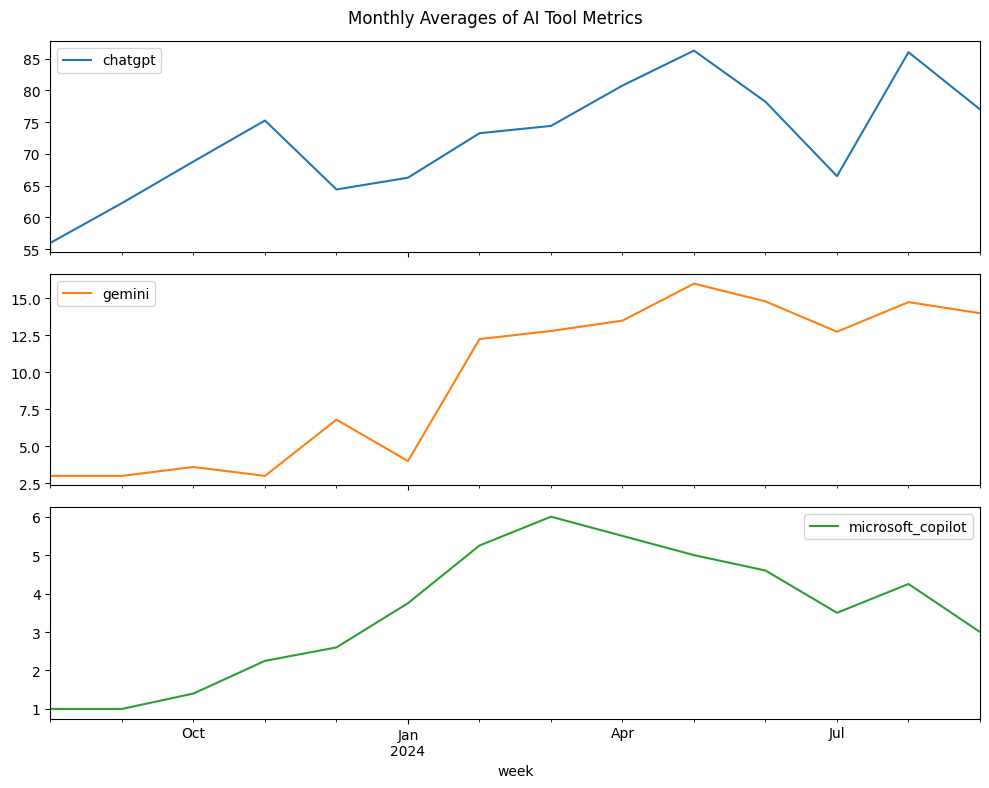

In [10]:
# Plot monthly trends
monthly_data.plot(subplots=True, figsize=(10, 8), title='Monthly Averages of AI Tool Metrics')
plt.tight_layout()
plt.show()